## Homework8
#### 李佳慜 10235501405

1.

In [17]:
import pandas as pd

df = pd.read_csv('D://save//github_bot_processed_data.csv')

print("默认显示的前5行数据：")
print(df.head())

pd.set_option('display.max_rows', 20)
print("\n设置显示前20行数据：")
print(df.head(20))

pd.set_option('display.max_columns', 5)
print("\n设置显示前5列数据：")
print(df.iloc[:, :5])

print("\n显示第10到第20行，所有列的数据：")
print(df.iloc[10:20])

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
print("\n重置显示选项到默认值后的前5行数据：")
print(df.head())

默认显示的前5行数据：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9        

2.

In [24]:
import pandas as pd

df = pd.read_csv('D://save//github_bot_processed_data.csv')

print("前5行数据:\n",df.head())

print("\nDataFrame的摘要信息:\n")
print(df.info())

print("\n描述性统计信息:\n",df.describe())

前5行数据:
    label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6 

head()和info()的区别：    
head()方法的输出是DataFrame的一个子集，包含前几行数据。输出格式与原始DataFrame相同，只是行数较少。     
info()方法的输出是关于DataFrame的摘要信息，不是DataFrame本身。输出包括每列的名称、非空值数量、数据类型以及内存使用情况。

3.

In [28]:
import pandas as pd

df = pd.read_csv('D://save//github_bot_processed_data.csv')

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')

df['created_at'] = df['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['updated_at'] = df['updated_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

df['public_repos'] = df['public_repos'].map('{:,}'.format)
df['public_gists'] = df['public_gists'].map('{:,}'.format)
df['followers'] = df['followers'].map('{:,}'.format)
df['following'] = df['following'].map('{:,}'.format)

formatted_columns = ['label', 'public_repos', 'followers', 'created_at', 'updated_at']
print(df[formatted_columns])

       label public_repos followers           created_at           updated_at
0      Human           26         5  2011-09-26 17:27:03  2023-10-13 11:21:10
1      Human           30         9  2015-06-29 10:12:46  2023-10-07 06:26:14
2      Human          103     1,212  2008-08-29 16:20:03  2023-10-02 02:11:21
3        Bot           49        84  2014-05-20 18:43:09  2023-10-12 12:54:59
4      Human           11         6  2012-08-16 14:19:13  2023-10-06 11:58:41
...      ...          ...       ...                  ...                  ...
19763    Bot           36        11  2014-07-02 23:27:34  2023-08-15 16:38:34
19764  Human           16         3  2017-12-06 21:56:31  2023-07-26 18:32:25
19765  Human           13        10  2015-11-14 14:44:05  2022-08-23 21:09:49
19766  Human            7         2  2021-11-23 18:55:29  2023-10-06 22:50:45
19767    Bot           10         1  2016-04-22 22:11:59  2022-07-07 19:48:21

[19768 rows x 5 columns]


4.

In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('D://save//github_bot_processed_data.csv')

for col in ['public_repos', 'public_gists', 'followers', 'following']:
    df[col + '_log'] = np.log1p(df[col])

print("原始数据:")
print(df[['public_repos', 'public_gists', 'followers', 'following']].head())
print("\n对数变换后的数据:")
print(df[['public_repos_log', 'public_gists_log', 'followers_log', 'following_log']].head())

原始数据:
   public_repos  public_gists  followers  following
0            26             1          5          1
1            30             3          9          6
2           103            49       1212        221
3            49             0         84          2
4            11             1          6          2

对数变换后的数据:
   public_repos_log  public_gists_log  followers_log  following_log
0          3.295837          0.693147       1.791759       0.693147
1          3.433987          1.386294       2.302585       1.945910
2          4.644391          3.912023       7.100852       5.402677
3          3.912023          0.000000       4.442651       1.098612
4          2.484907          0.693147       1.945910       1.098612


5.

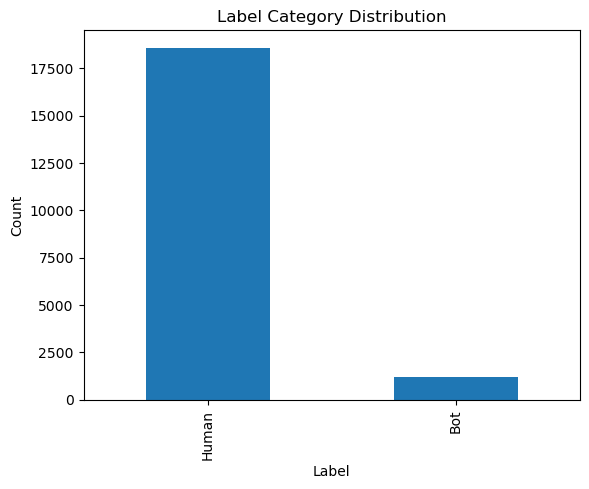

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D://save//github_bot_processed_data.csv')

df['label'].value_counts().plot(kind='bar')
plt.title('Label Category Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

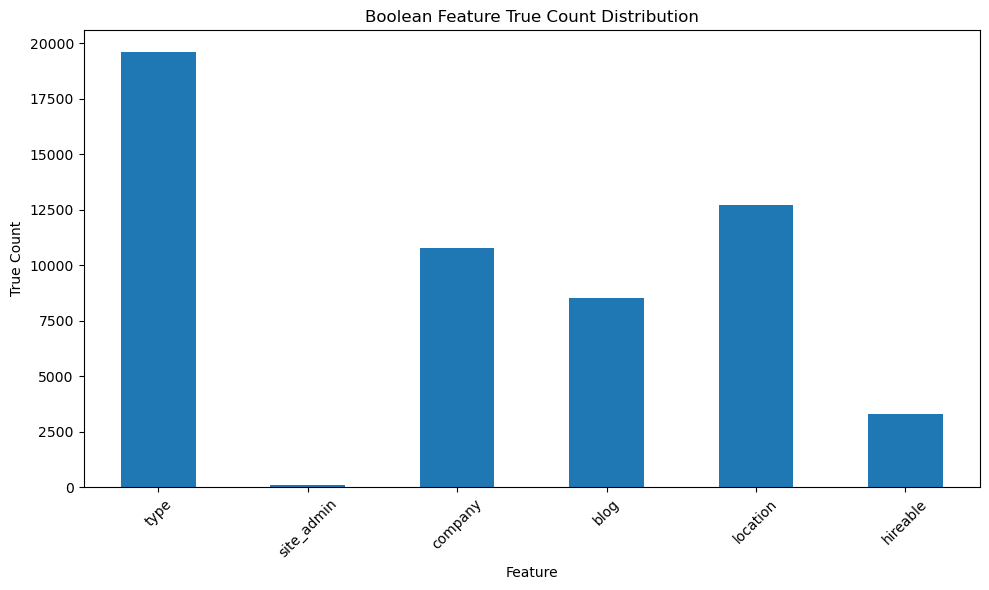

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D://save//github_bot_processed_data.csv')
bool_features = ['type', 'site_admin', 'company', 'blog', 'location', 'hireable']

bool_df = df[bool_features].sum()

plt.figure(figsize=(10, 6))
bool_df.plot(kind='bar') 
plt.title('Boolean Feature True Count Distribution')
plt.xlabel('Feature')
plt.ylabel('True Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

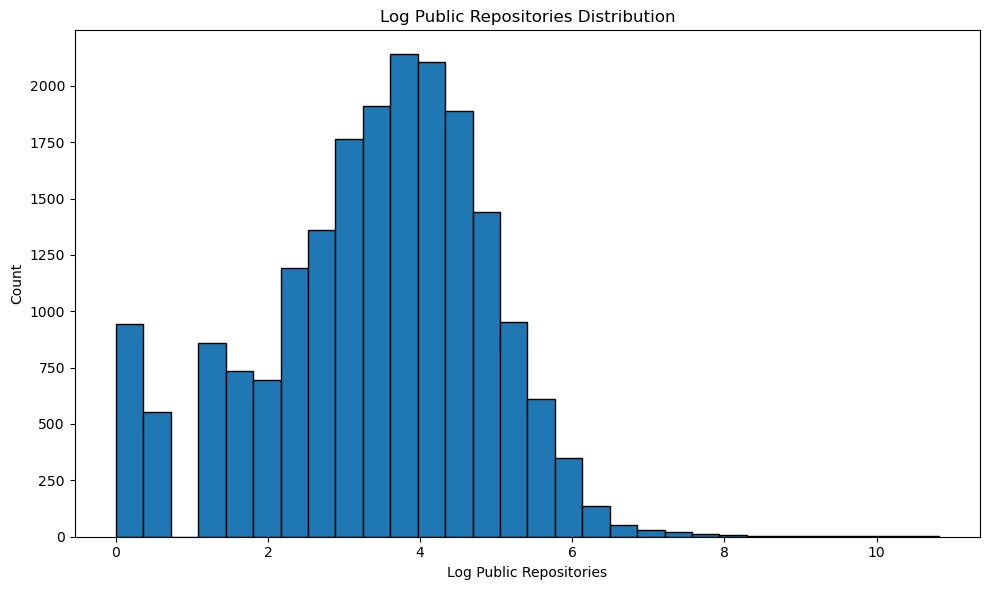

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv('D://save//github_bot_processed_data.csv')

df['log_public_repos'] = df['public_repos'].apply(lambda x: np.log(x + 1))

plt.figure(figsize=(10, 6))
plt.hist(df['log_public_repos'], bins=30,edgecolor='black')
plt.title('Log Public Repositories Distribution')
plt.xlabel('Log Public Repositories')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

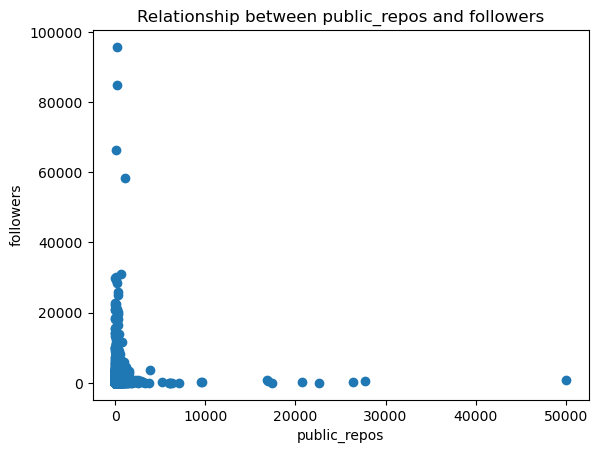

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D://save//github_bot_processed_data.csv')

plt.scatter(df['public_repos'], df['followers'])
plt.title('Relationship between public_repos and followers')
plt.xlabel('public_repos')
plt.ylabel('followers')
plt.show()

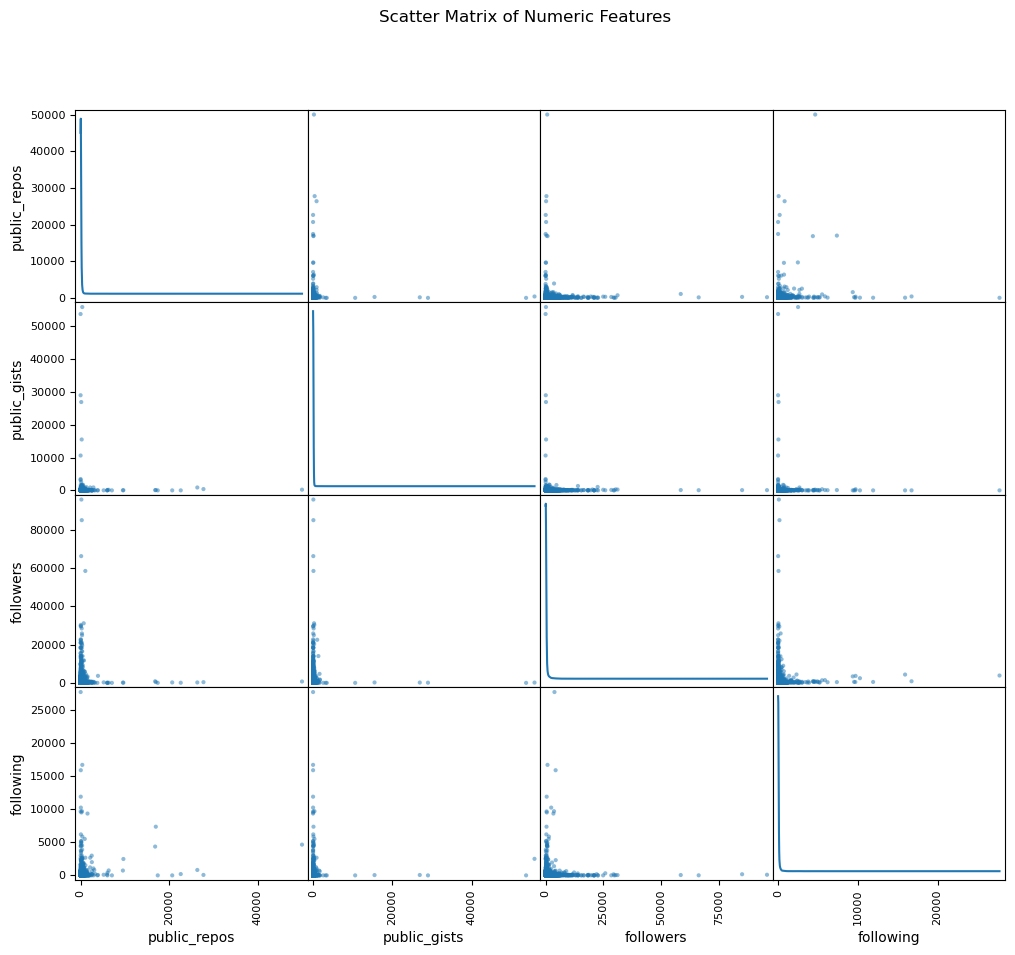

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df = pd.read_csv('D://save//github_bot_processed_data.csv')
numeric_features = ['public_repos', 'public_gists', 'followers', 'following']  

scatter_matrix(df[numeric_features], figsize=(12, 10), diagonal='kde')  
plt.suptitle('Scatter Matrix of Numeric Features')
plt.show()

6.

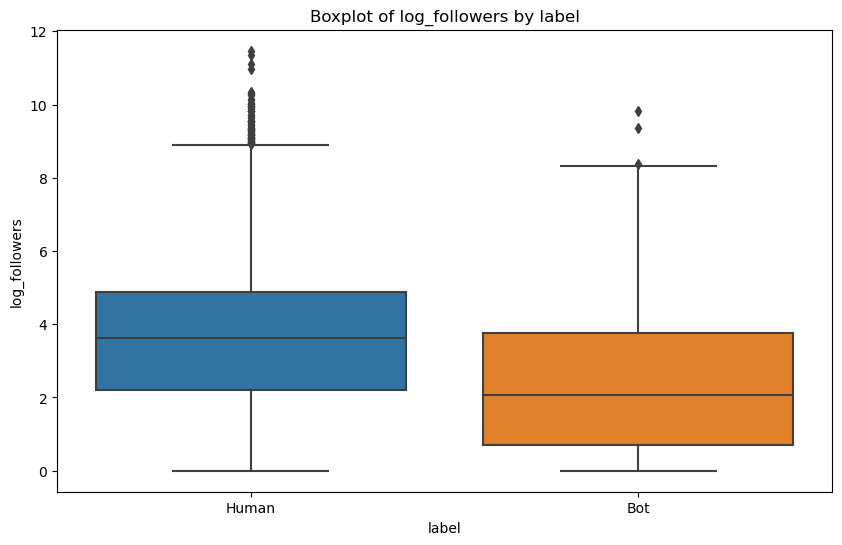

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('D://save//github_bot_processed_data.csv')
 
for col in ['public_repos', 'public_gists', 'followers', 'following']:
    df[f'log_{col}'] = np.log1p(df[col])  
 
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=df)
plt.title('Boxplot of log_followers by label')
plt.show()

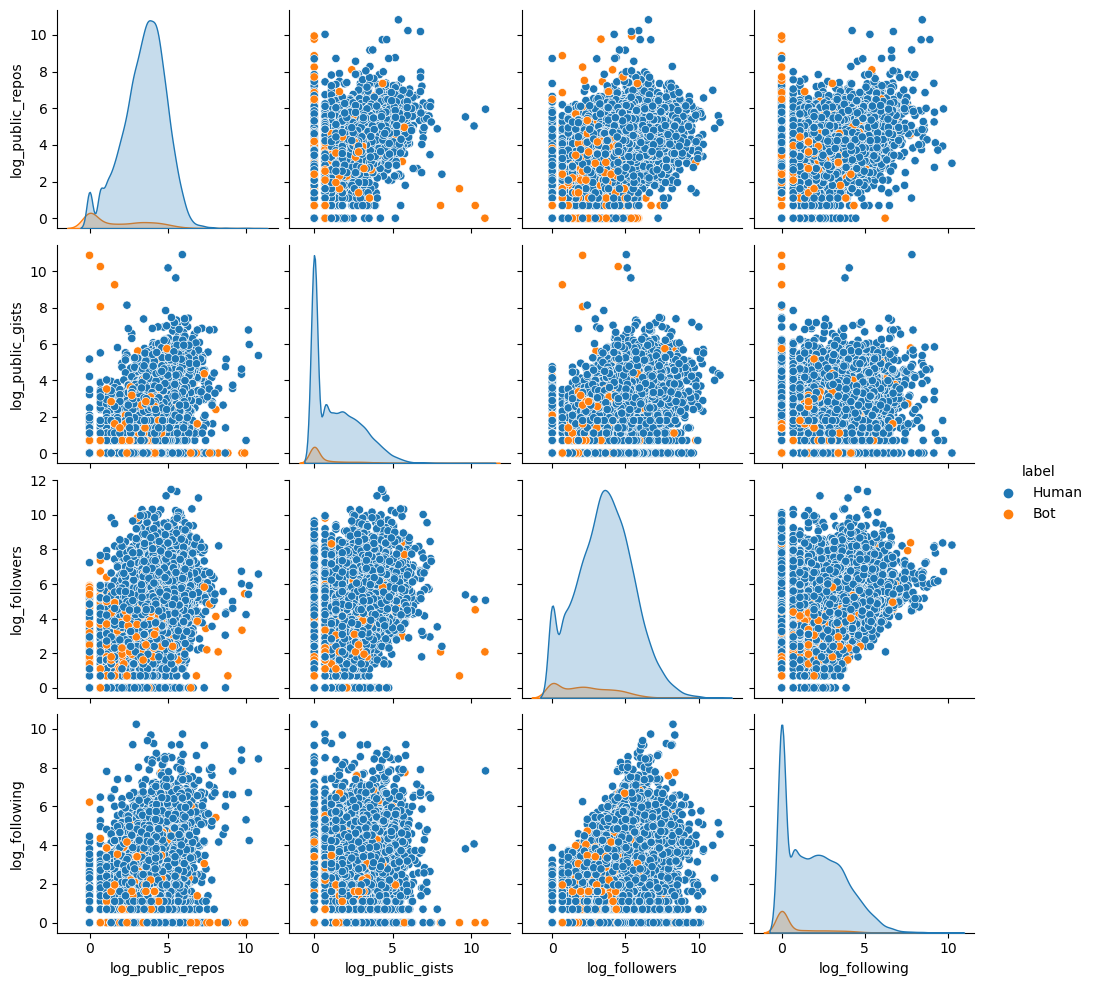

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('D://save//github_bot_processed_data.csv')

for col in ['public_repos', 'public_gists', 'followers', 'following']:
    df[f'log_{col}'] = np.log1p(df[col])
    
df.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.pairplot(df, hue='label', vars=['log_public_repos', 'log_public_gists', 'log_followers', 'log_following'])
plt.show()  

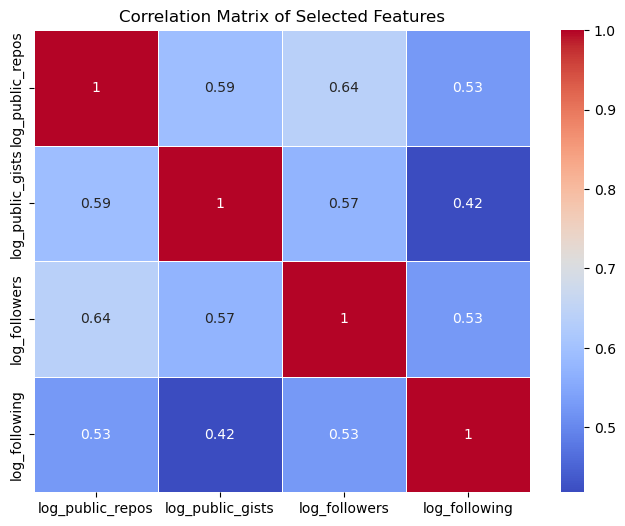

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('D://save//github_bot_processed_data.csv')

for col in ['public_repos', 'public_gists', 'followers', 'following']:
    df[f'log_{col}'] = np.log1p(df[col])
features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']

corr_matrix = df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Matrix of Selected Features')
plt.show()

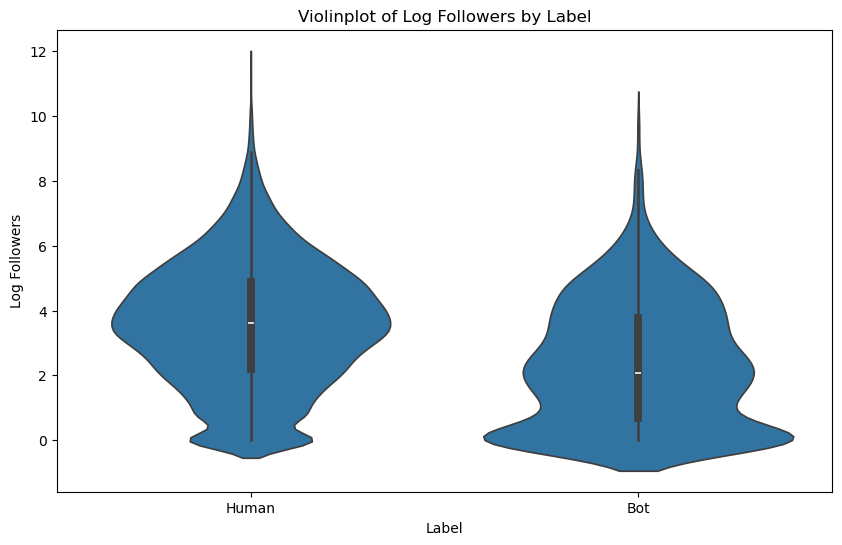

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('D://save//github_bot_processed_data.csv')

for col in ['public_repos', 'public_gists', 'followers', 'following']:
    df[f'log_{col}'] = np.log1p(df[col])
corr_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=df) 
plt.title('Violinplot of Log Followers by Label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

7.

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
 
df = pd.read_csv('D://save//github_bot_processed_data.csv')
 
profile = ProfileReport(df, title="GitHub Bot Processed Data Analysis", explorative=True)
 
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]